This is an example of using simple ANN on MNIST Dataset in the simplest way possible by me.

Hope everyone watching this likes it.

Import the important libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

Import the data from train and test csv file

In [17]:
train = pd.read_csv('../input/fashionmnist/fashion-mnist_train.csv')
test = pd.read_csv('../input/fashionmnist/fashion-mnist_test.csv')

check the shape of the train and test data

In [18]:
train.shape, test.shape

((60000, 785), (10000, 785))

Splitting the data into independent and dependent variables

In [19]:
X=train.drop(['label'],axis=1)
y=train['label']


# check the shape
X.shape, y.shape

((60000, 784), (60000,))

now let us divide the same for the testing data

In [20]:
X_test = test.drop(['label'],axis=1)
y_test = test['label']

# check the shape 
X_test.shape,y_test.shape

((10000, 784), (10000,))

Now let us check whether our target variable is imbalanced or not in training data

In [21]:
y.value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64

Now let us check whether our target variable is imbalanced or not in testing data

In [22]:
y_test.value_counts()

7    1000
6    1000
5    1000
4    1000
3    1000
2    1000
9    1000
1    1000
8    1000
0    1000
Name: label, dtype: int64

checking the same by plotting the data

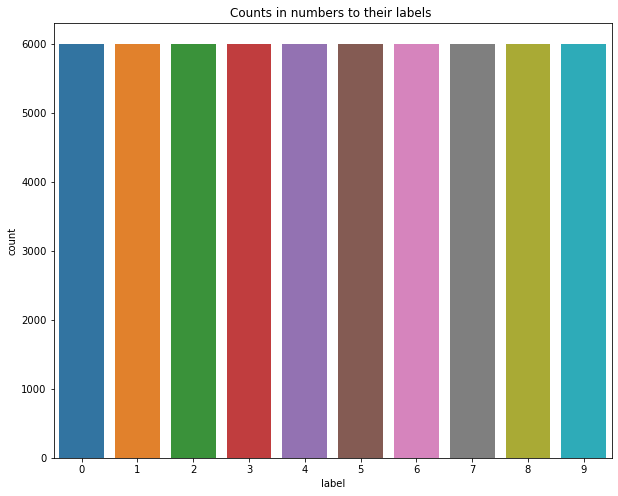

In [23]:
plt.subplots(figsize = (10,8))
plt.title('Counts in numbers to their labels ')
sns.countplot(x=y, data=train)
plt.show()

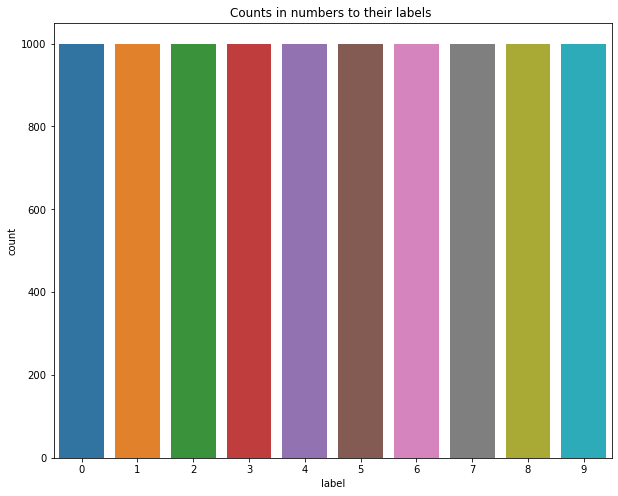

In [24]:
plt.subplots(figsize = (10,8))
plt.title('Counts in numbers to their labels ')
sns.countplot(x=y_test, data=train)
plt.show()

We can easily conclude from the above that the data is not unbalanced

Now we will split the data into training and testing

In [25]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=99)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((48000, 784), (12000, 784), (48000,), (12000,))

Here the shape of our data is not according to the ANN architecture, so we will reshape the data into CNN architecture that is (images,rows,cols,channels) Here the images will be the no of the images used , rows and columns will be the pixels of the images mentioned in the dataset descriptions which are 28 * 28 . First we will change the data into an array format.

we will change the data of training, validation and testing data

In [26]:
X_train = X_train.values.astype('float32')
X_val = X_val.values.astype('float32')
X_test = X_test.values.astype('float32')

In [29]:
X_train
X_val
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 3., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Rechecking the shape of the data

In [30]:
X_train = X_train.reshape(X_train.shape[0],28,28)
X_val = X_val.reshape(X_val.shape[0],28,28)
X_test = X_test.reshape(X_test.shape[0],28,28)

checking the shape of the data

In [31]:
X_train.shape, X_val.shape, X_test.shape, 

((48000, 28, 28), (12000, 28, 28), (10000, 28, 28))

Now we will check the value range of the data

In [32]:
X_train.max(),X_train.min()

(255.0, 0.0)

Our data is in range of 0 to 255, we will need to convert the data in the range of 0 to 1, so that our data
can be processed according to the ANN architecture.

We will scale the data by dividing the data by 255

In [33]:
X_train = X_train/255
X_val = X_val/255
X_test = X_test/255

# cheking the value range 
X_test.max(), X_test.min()

(1.0, 0.0)

Now our data is scaled, now we will build the model

In [34]:
# import the model
model=Sequential()
# import the layers
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

Compiling the model

In [36]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [37]:
# checking the summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


fitting the model

In [38]:
%%time
history=model.fit(X_train,y_train, batch_size=64, epochs=10, validation_data=(X_val,y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 4s 77us/sample - loss: 0.5200 - accuracy: 0.8151 - val_loss: 0.3929 - val_accuracy: 0.8576
Epoch 2/10
48000/48000 [==============================] - 3s 60us/sample - loss: 0.3815 - accuracy: 0.8613 - val_loss: 0.3594 - val_accuracy: 0.8680
Epoch 3/10
48000/48000 [==============================] - 3s 63us/sample - loss: 0.3419 - accuracy: 0.8749 - val_loss: 0.3594 - val_accuracy: 0.8644
Epoch 4/10
48000/48000 [==============================] - 3s 63us/sample - loss: 0.3136 - accuracy: 0.8844 - val_loss: 0.3347 - val_accuracy: 0.8788
Epoch 5/10
48000/48000 [==============================] - 3s 62us/sample - loss: 0.2964 - accuracy: 0.8904 - val_loss: 0.3089 - val_accuracy: 0.8855
Epoch 6/10
48000/48000 [==============================] - 3s 60us/sample - loss: 0.2799 - accuracy: 0.8964 - val_loss: 0.3187 - val_accuracy: 0.8860
Epoch 7/10
48000/48000 [==============================] 

Here we can see that our accuracy comes to 91% but our validation accuracy comes to 88% , so here we can say that our model is overfitting


In [40]:
accuracy,loss=model.evaluate(X_test,y_test)
accuracy,loss

10000/10000 [==============================] - 1s 53us/sample - loss: 0.3251 - accuracy: 0.8880


(0.32509087054729463, 0.888)

Plotting the same

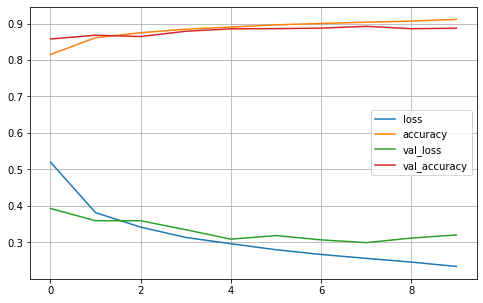

In [41]:
# plot the figure now
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

Now let  us make the prediction using confusion matrix

In [42]:
# plot confusion matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [43]:
y_pred = model.predict_classes(X_test)
y_pred

array([0, 1, 2, ..., 8, 8, 1])

In [44]:
class_names=[ 'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
mat=confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, class_names= class_names,show_normed=True, figsize=(7,7))